# Tricks for making a collection of plots spanning multiple pages of a pdf

1. Lots of scatter points in a plot will take a long time to load. Rasterizing those objects will reduce file size and speed up loading the plots.
2. Save your plots as multi-page pdfs to make loading the pdf more efficient. 

Combine the two tricks for maximum effect.

### Rasterizing

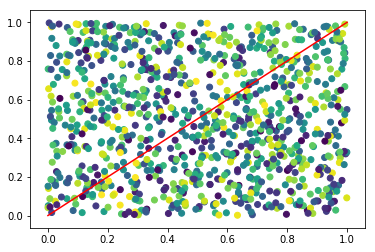

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)

# Rasterizing the heavy graphics
x = np.random.random(1000)
y = np.random.random(1000)
c = np.random.random(1000)
ax.scatter(x, y, c=c, rasterized=True) # rasterized keyword True means these points will be rasterized. 

# But leave some stuff as vector graphics
a = np.linspace(0,1,10)
b = np.linspace(0,1,10)
ax.plot(a,b, color='red')

fig.savefig('plots/rasterized_plot.pdf', dpi=300) # dpi determines resolution, 300 is a good general target. 

### Multi-page pdfs

This example puts a single plot on each page, but you can of course put multiple plots per page, too. 

In [23]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import numpy as np

book_name = 'plots/pdf_book.pdf'
pp = PdfPages(book_name)
plt.close('all')

for i in range(10):
    ### Plotting code
    x = np.random.random(100)
    y = np.random.random(100)*10
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x, y, c=x*10) # with color scale
    pp.savefig()
    plt.close('all')
    #################
    
pp.close()